# Homework 3: Gaussian Process Regression

In [45]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [46]:
#Pre-processing
x = np.zeros(100, dtype=float)
y = np.zeros(100, dtype=float)
counter = 0
with open('gp.dat') as file:
    for line in file:
        data = line.split()
        x[counter] = data[0]
        y[counter] = data[1]
        counter += 1

mean_x = np.mean(x)
mean_x

0.505266391019

Text(0.5, 1.0, 'Data')

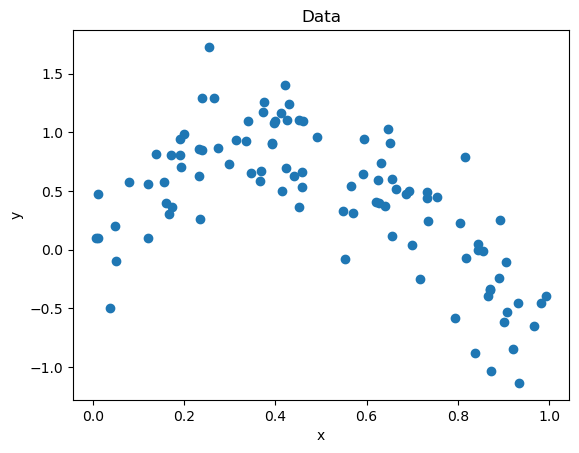

In [47]:
#Plot the points
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Data")

Text(0.5, 1.0, 'Data')

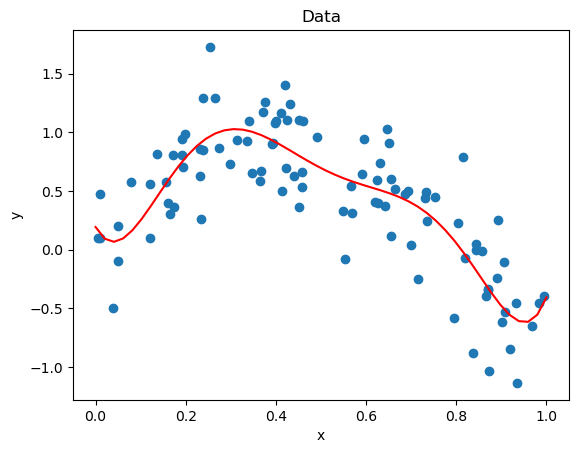

In [49]:
#Define k:
def k(x_i, x_j, tau_sq):
    val = -((x_i - x_j)**2)/(2*tau_sq)
    return np.exp(val)
x = x.reshape(-1, 1)

gp = GaussianProcessRegressor()
gp.fit(x, y)

x_lin = np.linspace(0, 1)
x_lin = x_lin.reshape(-1, 1)
y_pred, MSE = gp.predict(x_lin, return_std=True)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x_lin, y_pred, color='r')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Data")
